<a href="https://colab.research.google.com/github/Quant-Projects/Recession-Prediction/blob/master/Recession_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
sp500 = pd.read_csv("^GSPC (6).csv", parse_dates=['Date'])
recession = pd.read_csv("recession_data.csv", parse_dates=['DATE'])

In [0]:
sp500_values = []

for i in sp500.values[::3]:
  sp500_values.append(i)

In [0]:
sp500 = pd.DataFrame(sp500_values, columns=sp500.keys())

In [0]:
sp500.set_index("Date", drop=True, inplace=True)

In [0]:
sp500.drop(sp500.tail(3).index,inplace=True)

In [998]:
sp500.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-01,2362.340088,2398.159912,2328.949951,2384.199951,2384.199951,65265670000
2017-07-01,2431.389893,2484.040039,2407.699951,2470.300049,2470.300049,63169400000
2017-10-01,2521.199951,2582.979980,2520.399902,2575.260010,2575.260010,70871570000
2018-01-01,2683.729980,2872.870117,2682.360107,2823.810059,2823.810059,76860120000
2018-04-01,2633.449951,2717.489990,2553.800049,2648.050049,2648.050049,69648590000


In [0]:
recession.set_index("DATE", drop=True, inplace=True)

In [1000]:
recession.tail()

,JHDUSRGDPBR
DATE,
2017-04-01,0.0
2017-07-01,0.0
2017-10-01,0.0
2018-01-01,0.0
2018-04-01,0.0


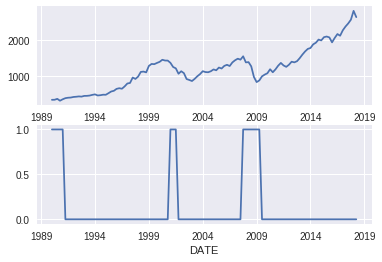

In [1001]:
plt.subplot(211)
sp500['Adj Close'].plot()
plt.subplot(212)
recession['JHDUSRGDPBR'].plot()

In [1002]:
recession.loc[recession['JHDUSRGDPBR'] == 1.0]

,JHDUSRGDPBR
DATE,
1990-01-01,1.0
1990-04-01,1.0
1990-07-01,1.0
1990-10-01,1.0
1991-01-01,1.0
2001-01-01,1.0
2001-04-01,1.0
2001-07-01,1.0
2007-10-01,1.0


In [0]:
i1 = recession.loc[(recession.index == "2000-10-01")].index
i2 = recession.loc[(recession.index == "2000-07-01")].index
i3 = recession.loc[(recession.index == "2000-04-01")].index
i7 = recession.loc[(recession.index == "2000-01-01")].index

i4 = recession.loc[(recession.index == "2007-07-01")].index
i5 = recession.loc[(recession.index == "2007-04-01")].index
i6 = recession.loc[(recession.index == "2007-01-01")].index
i8 = recession.loc[(recession.index == "2006-10-01")].index

In [0]:
recession['JHDUSRGDPBR'].replace(1.0, 2.0, inplace=True)

In [0]:
recession.loc[i1, 'JHDUSRGDPBR'] = 1
recession.loc[i2, 'JHDUSRGDPBR'] = 1
recession.loc[i3, 'JHDUSRGDPBR'] = 1
recession.loc[i7, 'JHDUSRGDPBR'] = 1

recession.loc[i4, 'JHDUSRGDPBR'] = 1
recession.loc[i5, 'JHDUSRGDPBR'] = 1
recession.loc[i6, 'JHDUSRGDPBR'] = 1
#recession.loc[i8, 'JHDUSRGDPBR'] = 1

In [0]:
vix = pd.read_csv("^VIX (1).csv", parse_dates=['Date'])

In [0]:
vix_data = []

for i in vix.values[::3]:
  vix_data.append(i)

In [0]:
vix = pd.DataFrame(vix_data, columns=vix.keys())
vix.set_index("Date", drop=True, inplace=True)

In [1009]:
vix.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-01,12.59,16.280001,10.22,10.82,10.82,0
2017-07-01,11.07,13.050000,8.84,10.26,10.26,0
2017-10-01,9.59,13.200000,9.11,10.18,10.18,0
2018-01-01,10.95,15.420000,8.92,13.54,13.54,0
2018-04-01,21.07,25.719999,14.57,15.93,15.93,0


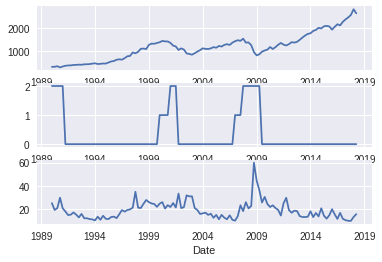

In [1010]:
plt.subplot(311)
sp500['Adj Close'].plot()
plt.subplot(312)
recession['JHDUSRGDPBR'].plot()
plt.subplot(313)
vix['Adj Close'].plot()

In [0]:
yield_data = pd.read_excel("ust_month_average.xlsx", parse_dates=['date'])

In [1012]:
sp500.shape

(114, 6)

In [0]:
y_data = []

for i in yield_data.values[::3]:
  y_data.append(i)

In [0]:
yield_data = pd.DataFrame(y_data, columns=yield_data.keys())

In [1015]:
yield_data.head()

,date,year,month,BC_1MONTH,BC_3MONTH,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR,BC_30YEARDISPLAY
0,1990-01-31,1990,1,0.0,7.90,7.96,7.92,8.09,8.13,8.12,8.20,8.21,0.0,8.26,0.0
1,1990-04-30,1990,4,0.0,8.04,8.27,8.40,8.72,8.78,8.77,8.81,8.79,0.0,8.76,0.0
2,1990-07-31,1990,7,0.0,7.87,7.92,7.94,8.16,8.26,8.33,8.46,8.47,0.0,8.50,0.0
3,1990-10-31,1990,10,0.0,7.40,7.53,7.55,7.88,8.07,8.33,8.59,8.72,0.0,8.86,0.0
4,1991-01-31,1991,1,0.0,6.41,6.58,6.64,7.13,7.38,7.70,7.97,8.09,0.0,8.27,0.0


In [1016]:
yield_data.shape

(110, 15)

In [0]:
sp500 = sp500[:110]
vix = vix[:110]
recession = recession[:110]

In [1018]:
print(sp500.shape, vix.shape, recession.shape, yield_data.shape)

(110, 6) (110, 6) (110, 1) (110, 15)


CREATE FEATURES

In [0]:
training_features = pd.DataFrame()

In [0]:
delta_vix = []

for i in range(len(vix)):
  try:
      delta_vix.append(vix['Adj Close'].values[i] - vix['Adj Close'].values[i - 4])
  except:
      delta_vix.append(np.nan)

In [1021]:
delta_vix

[13.490001000000001,
 2.460001000000002,
 9.120001,
 19.220001,
 -4.450001,
 -1.2800000000000011,
 -5.930001000000001,
 -14.560001,
 -3.5100000000000016,
 -2.709999999999999,
 -2.01,
 0.6699999999999982,
 -4.979999999999999,
 -3.1099999999999994,
 -1.4399999999999995,
 -4.689999999999998,
 -1.7899999999999991,
 1.3499999999999996,
 -0.5999999999999996,
 3.0999999999999996,
 1.33,
 -2.0199999999999996,
 2.3599999999999994,
 -0.7300000000000004,
 0.5699999999999985,
 4.08,
 5.969999,
 4.280001,
 6.9399989999999985,
 4.229998999999998,
 2.0200010000000006,
 16.979999000000003,
 2.0,
 1.120001000000002,
 3.3199989999999993,
 -7.040001000000004,
 4.780001000000002,
 3.8900000000000006,
 -0.16000000000000014,
 -5.849997999999999,
 -1.2999989999999997,
 1.130001,
 -3.899999000000001,
 1.4299979999999977,
 -2.9300010000000007,
 -0.7200009999999999,
 0.8800010000000036,
 9.930002000000002,
 -0.9299999999999997,
 -3.5700000000000003,
 10.409997999999995,
 -2.420002,
 10.080000000000002,
 -0.7000

In [0]:
delta_sp = []

for i in range(len(sp500)):
  try:
    delta_sp.append(sp500['Adj Close'].values[i] - sp500['Adj Close'].values[i - 4])
  except:
    delta_sp.append(np.nan)

In [0]:
training_features['Delta Yield'] = yield_data['BC_1YEAR'] - yield_data['BC_1YEAR'].shift(4)
#training_features['Delta Yield < 0'] = training_features['Delta Yield'] < 0.0
training_features['Delta VIX'] = delta_vix
#training_features['Delta SP500'] = delta_sp

In [1024]:
training_features

,Delta Yield,Delta VIX
0,NaN,13.490001
1,NaN,2.460001
2,NaN,9.120001
3,NaN,19.220001
4,-1.28,-4.450001
5,-2.16,-1.280000
6,-1.63,-5.930001
7,-2.22,-14.560001
8,-2.49,-3.510000
9,-1.94,-2.710000


In [1025]:
training_features.isnull().any()

Delta Yield     True
Delta VIX      False
dtype: bool

In [1026]:
training_features.isnull().sum()

Delta Yield    4
Delta VIX      0
dtype: int64

In [0]:
training_features.fillna(value=training_features['Delta Yield'].mean(), inplace=True)

In [0]:
X = training_features.values
y = recession.values

In [1029]:
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import learning_curve, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [1051]:
rf = RandomForestClassifier(n_estimators=250)
base = BaggingClassifier(base_estimator=rf, n_estimators=100)

score = cross_val_score(rf, X, y, cv=10, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


In [1052]:
score.mean()

0.9291666666666666

In [0]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=.2)

In [1055]:
rf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1056]:
confusion_matrix(testY, rf.predict(testX))

array([[12,  2,  0],
       [ 0, 22,  0],
       [ 0,  0, 17]])

In [1057]:
rf.feature_importances_

array([0.58944204, 0.41055796])